# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Hvad mangler:

1. Sæt filer sammen.
2. Færdiggør standardisering og implementer i kode.
3. Smid kode over i .py file (og sammenskriv regressionskode).
4. Kommenter på al koden.
5. Fortolk på al koden.
6. Simpel deskriptiv statistik før de labre regressioner og plots
7. Evt. print liste over unikke lande.


Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pandas_datareader import wb
import statsmodels.api as sm 
from sklearn import datasets
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from IPython.display import display
from ipywidgets import interact

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

In [2]:
# Get World Bank Data, all countries, 1990-2017
# - GDP
# - GINI

# List of variables to rename
wb_variables_with_new_names = {'SI.POV.GINI'   :'GINI',
                               'NY.GDP.PCAP.KD':'GDP',
                               'NY.GDP.PCAP.KD.ZG':'GDP_growth'}

# Download and clean data
wb1 = dataproject.my_wb_downloader('all', wb_variables_with_new_names, 1990, 2017)

# Print data
wb1.head(5)


,country,year,GINI,GDP,GDP_growth
0,Africa Eastern and Southern,2017,NaN,1534.683482,-0.015718
1,Africa Eastern and Southern,2016,NaN,1534.924746,-0.235775
2,Africa Eastern and Southern,2015,NaN,1538.552268,0.090602
3,Africa Eastern and Southern,2014,NaN,1537.159571,1.229959
4,Africa Eastern and Southern,2013,NaN,1518.482850,1.410049


In [3]:
wb_wgi=pd.read_csv("WB WGI Levels.csv")

drop_these = ['Country Code','Series Code'] # use list comprehension to create list of columns
wb_wgi.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
wb_wgi.head(5)

col_dict = {}
for i in range(1996, 2022): # range goes from 1996 to 2021
    col_dict[str(i)+" [YR"+str(i)+"]"] = f'wgi{i}' 
col_dict

wb_wgi.rename(columns = col_dict, inplace=True)
wb_wgi.rename (columns ={'Country Name': 'country'}, inplace=True)
wb_wgi.sample(10)

,country,Series Name,wgi1996,wgi1998,wgi2000,wgi2002,wgi2003,wgi2004,wgi2005,wgi2006,...,wgi2012,wgi2013,wgi2014,wgi2015,wgi2016,wgi2017,wgi2018,wgi2019,wgi2020,wgi2021
500,"Hong Kong SAR, China",Political Stability and Absence of Violence/Te...,0.576565086841583,0.701060175895691,0.935157179832459,0.908920228481293,0.947880446910858,1.14497804641724,1.33629047870636,1.1909122467041,...,1.0062894821167,0.922868311405182,1.15322852134705,1.04629456996918,0.750807106494904,0.829483866691589,0.783555507659912,-0.222177982330322,0.092972032725811,0.261168509721756
80,Azerbaijan,Political Stability and Absence of Violence/Te...,-0.828929543495178,-0.702288448810577,-0.829794764518738,-1.18536496162415,-0.948100388050079,-1.05981111526489,-1.12481939792633,-1.09268236160278,...,-0.715751826763153,-0.412859916687012,-0.559909522533417,-0.729565560817719,-0.803879082202911,-0.747919917106628,-0.706759810447693,-0.685912430286407,-0.839061498641968,-0.853478372097015
1211,United Arab Emirates,Voice and Accountability: Estimate,-0.409403622150421,-0.519163191318512,-0.516841351985931,-0.631543517112732,-0.912192344665527,-0.687912881374359,-0.708473205566406,-0.999829351902008,...,-1.00081920623779,-1.01948356628418,-1.06136298179626,-1.11241888999939,-1.05032098293304,-1.09680497646332,-1.1269211769104,-1.14009809494019,-1.17846524715424,-1.19277334213257
838,New Zealand,Rule of Law: Estimate,1.85839378833771,1.85049915313721,1.79541397094727,1.79115116596222,1.84832954406738,1.84883081912994,1.84639847278595,1.79479086399078,...,1.88321006298065,1.87015104293823,2.00416088104248,1.99450325965881,1.9442617893219,1.91612315177917,1.86662292480469,1.87633287906647,1.87339925765991,1.81831800937653
709,Maldives,Government Effectiveness: Estimate,0.901294231414795,0.902549386024475,0.872710645198822,0.834610283374786,0.576517760753632,0.373675912618637,0.239690825343132,0.170396283268929,...,-0.18681862950325,-0.304104119539261,-0.339784145355225,-0.349228292703629,-0.273779392242432,-0.425809234380722,-0.452918171882629,-0.14983107149601,-0.00686872284859419,0.386397957801819
175,Bulgaria,Government Effectiveness: Estimate,-0.0425848290324211,-0.0834641233086586,0.0379754789173603,0.173596397042274,0.0305347591638565,0.075740858912468,0.131950035691261,-0.136293441057205,...,-0.031450092792511,-0.0155216613784432,-0.113804370164871,0.0163866877555847,0.120276361703873,0.128312349319458,0.140734523534775,0.20231106877327,-0.182731494307518,-0.139183074235916
483,Guyana,Regulatory Quality: Estimate,-0.173729807138443,-0.0557225905358791,-0.130214244127274,-0.346247434616089,-0.340948224067688,-0.387165576219559,-0.49572366476059,-0.613583862781525,...,-0.62617301940918,-0.608322560787201,-0.528059959411621,-0.513476371765137,-0.422596544027328,-0.385692209005356,-0.538145840167999,-0.603396594524384,-0.52619081735611,-0.519256711006165
570,"Jersey, Channel Islands",Control of Corruption: Estimate,..,..,..,..,..,..,..,..,...,1.21378171443939,1.23540329933167,1.20334684848785,1.18745088577271,1.13519692420959,1.16190302371979,1.09827733039856,1.04026639461517,1.03099703788757,1.02282333374023
542,Ireland,Political Stability and Absence of Violence/Te...,1.34345364570618,1.51291000843048,1.58410012722015,1.50421679019928,1.34845769405365,1.17082571983337,1.29866683483124,1.19241058826447,...,0.941072702407837,0.901075720787048,1.05299115180969,0.908455491065979,0.847818851470947,1.00243484973907,1.02111232280731,0.966389119625092,0.978661596775055,0.856822490692139
1064,Spain,Political Stability and Absence of Violence/Te...,0.17475751042366,0.132018834352493,0.459468245506287,0.438226073980331,-0.047485888004303,-0.0905463024973869,0.19302661716938,-0.150648653507233,...,-0.0295164491981268,0.0120177594944835,0.243121743202209,0.251491189002991,0.413188278675079,0.282884180545807,0.287804037332535,0.310685813426971,0.437478542327881,0.579050898551941


In [4]:
wb_wgi = pd.wide_to_long(wb_wgi, stubnames='wgi', i=['country','Series Name'], j='year')
wb_wgi = wb_wgi.reset_index()
# Rename colum with series names to "ser"
wb_wgi.rename(columns = {'Series Name':'ser'}, inplace=True)

#Get a list of all the series in the data
namelist = wb_wgi.ser.unique()

newnames = {'Control of Corruption: Estimate':'COC',
            'Government Effectiveness: Estimate':'GOV', 
            'Political Stability and Absence of Violence/Terrorism: Estimate':'RSA', 
            'Regulatory Quality: Estimate':'REQ', 
            'Rule of Law: Estimate':'ROL', 
            'Voice and Accountability: Estimate':'VOA'}

# Renames series
for index, name in enumerate(namelist):
    print(index, "Now rename Series", name, "=", newnames[name])
    
    wb_wgi.loc[wb_wgi.ser == name, 'ser'] = newnames[name]

newnamelist = wb_wgi.ser.unique()

wb_wgi.sample(5)

0 Now rename Series Control of Corruption: Estimate = COC
1 Now rename Series Government Effectiveness: Estimate = GOV
2 Now rename Series Political Stability and Absence of Violence/Terrorism: Estimate = RSA
3 Now rename Series Regulatory Quality: Estimate = REQ
4 Now rename Series Rule of Law: Estimate = ROL
5 Now rename Series Voice and Accountability: Estimate = VOA


,country,ser,year,wgi
15463,Lithuania,COC,2006,0.155884757637978
26350,Thailand,VOA,2014,-0.874775230884552
27496,Uganda,GOV,2010,-0.575548768043518
995,Antigua and Barbuda,GOV,2005,0.447335571050644
26808,Trinidad and Tobago,GOV,2012,0.481429755687714


In [67]:
wb_new=pd.pivot(wb_wgi, index=['country','year'], columns = 'ser', values= 'wgi')
wb_new=wb_new.reset_index()
final = pd.merge(wb1, wb_new, on=['year', 'country'], how = 'outer')

In [68]:
col_list = ['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']
for i in col_list:
    final.loc[final[i]==".."] = np.nan
    final[i]=final[i].astype(float)
final = final.dropna(subset=['country','year'], how='any')
final.year = final.year.astype(int)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191 entries, 0 to 8493
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     8191 non-null   object 
 1   year        8191 non-null   int32  
 2   GINI        1577 non-null   float64
 3   GDP         6624 non-null   float64
 4   GDP_growth  6641 non-null   float64
 5   COC         4619 non-null   float64
 6   GOV         4619 non-null   float64
 7   REQ         4619 non-null   float64
 8   ROL         4619 non-null   float64
 9   RSA         4619 non-null   float64
 10  VOA         4619 non-null   float64
dtypes: float64(9), int32(1), object(1)
memory usage: 735.9+ KB


# Analysis

In [101]:
# Group variables
allyearslist = list(range(2002,2017))
subyearlist  = [2002, 2007, 2012, 2017]

# List of all governance index variables
varlist_wgi = list(newnames.values())

# List of all normalized governance index variables
varlist_wgi_norm = list(map(lambda x: x + '_norm', varlist_wgi))

# List of all variables
varlist_all = ['GDP', 'GINI'] + varlist_wgi

# Ensure all variables are perfectly normalized within year
final = dataproject.standardize_by_group(final, varlist_wgi, 'year')

# Simple Descriptive Statistics
simplestats_noyear = dataproject.calc_simplestats(final, varlist_all,      group_by_year=False)
simplestats        = dataproject.calc_simplestats(final, varlist_all,      group_by_year=True, groups_to_print=subyearlist)
simplestats_norm   = dataproject.calc_simplestats(final, varlist_wgi_norm, group_by_year=True, groups_to_print=subyearlist)

# Print stats
print('N, Mean, Std. across all years')
display(simplestats_noyear)

# Print stats by year
for var in varlist_all:
    print(var)
    display(simplestats[var])

# Print normalized wgi stats by year
for var in varlist_wgi_norm:
    print(var)
    display(simplestats_norm[var])


N, Mean, Std. across all years


,GDP,GINI,COC,GOV,RSA,REQ,ROL,VOA
count,6624.000000,1577.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000
mean,11852.048243,38.268992,-0.010643,-0.008899,-0.028062,-0.007569,-0.022902,-0.024310
std,17624.031024,9.040012,0.999923,0.998163,0.996367,0.998880,1.003089,0.997422


GDP


,count,mean,std
year,,,
2002,229,11242.877165,16976.466283
2007,246,13321.879873,19591.879133
2012,251,13596.819953,18853.108183
2017,248,13899.362356,18753.806262


GINI


,count,mean,std
year,,,
2002,54,41.307407,9.622965
2007,70,36.481429,8.103055
2012,85,36.310588,7.231891
2017,76,35.507895,6.994164


COC


,count,mean,std
year,,,
2002,186,-0.003314,1.010104
2007,205,-0.001488,1.000923
2012,210,0.003180,1.004181
2017,202,-0.039934,0.990901


GOV


,count,mean,std
year,,,
2002,186,-6.809671e-10,1.000000
2007,205,-2.534813e-03,1.003514
2012,210,9.515541e-03,0.999963
2017,202,-3.019827e-02,1.001690


RSA


,count,mean,std
year,,,
2002,186,-0.007805,1.005875
2007,205,-0.015685,0.998778
2012,210,-0.009879,0.999587
2017,202,-0.045241,0.995372


REQ


,count,mean,std
year,,,
2002,186,-2.803982e-09,1.000000
2007,205,-8.804664e-04,1.004836
2012,210,9.753901e-03,0.999653
2017,202,-2.368051e-02,1.004438


ROL


,count,mean,std
year,,,
2002,186,-0.060509,1.016282
2007,205,-0.011584,1.004498
2012,210,-0.000605,1.001863
2017,202,-0.029992,1.000092


VOA


,count,mean,std
year,,,
2002,186,-0.068941,1.002485
2007,205,-0.014475,1.000576
2012,210,-0.004995,1.003467
2017,202,-0.010031,0.999662


COC_norm


,count,mean,std
year,,,
2002,186,-1.850372e-17,1.0
2007,205,-1.299773e-17,1.0
2012,210,-2.431917e-17,1.0
2017,202,9.893076e-18,1.0


GOV_norm


,count,mean,std
year,,,
2002,186,-1.134099e-17,1.0
2007,205,-1.733031e-17,1.0
2012,210,0.000000e+00,1.0
2017,202,-1.868692e-17,1.0


RSA_norm


,count,mean,std
year,,,
2002,186,-1.193788e-18,1.0
2007,205,1.353931e-17,1.0
2012,210,1.057355e-18,1.0
2017,202,-1.099231e-18,1.0


REQ_norm


,count,mean,std
year,,,
2002,186,-1.193788e-18,1.0
2007,205,2.653704e-17,1.0
2012,210,-7.401487e-18,1.0
2017,202,-9.893076e-18,1.0


ROL_norm


,count,mean,std
year,,,
2002,186,1.432546e-17,1.0
2007,205,-5.957294e-18,1.0
2012,210,-2.749124e-17,1.0
2017,202,1.758769e-17,1.0


VOA_norm


,count,mean,std
year,,,
2002,186,2.626334e-17,1.0
2007,205,1.137302e-17,1.0
2012,210,1.850372e-17,1.0
2017,202,-2.748077e-17,1.0


In [ ]:
# Assuming `final_data` is the correct DataFrame object
final_data = final.dropna(subset=['GINI', 'GDP', 'COC'], how='any')

# Marker size in units of points^2
quality = final_data.COC

# Get minimum and maximum values of COC for colorbar range
cmin = final_data.COC.min()
cmax = final_data.COC.max()

def plot_scatter(year):
    fig, ax = plt.subplots()
    scatter = ax.scatter(final_data[final_data['year'] == year]['GINI'], final_data[final_data['year'] == year]['GDP'],
                         c=final_data[final_data['year'] == year]['COC'], alpha=0.5, vmin=cmin, vmax=cmax)
    ax.set_xlabel(r'$GINI$', fontsize=15)
    ax.set_ylabel(r'$GDP$', fontsize=15)
    ax.set_title('GINI and GDP (Year: {})'.format(year))
    ax.set_xlim(final_data['GINI'].min(), final_data['GINI'].max())  # Set x-axis limits
    ax.set_ylim(final_data['GDP'].min(), final_data['GDP'].max())  # Set y-axis limits
    ax.grid(True)
    fig.tight_layout()
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('COC', fontsize=12)  # Set color bar label
    plt.show()

years = sorted(final_data['year'].unique())  # Get unique years in ascending order

# Create interactive slider for year variable
interact(plot_scatter, year=years)

C:\Users\krist\AppData\Local\Temp\ipykernel_21728\3539558156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data2['GINI_lagged'] = final_data2['GINI'].shift(i * 10)
C:\Users\krist\AppData\Local\Temp\ipykernel_21728\3539558156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data2['GINI_lagged'] = final_data2['GINI'].shift(i * 10)
C:\Users\krist\AppData\Local\Temp\ipykernel_21728\3539558156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

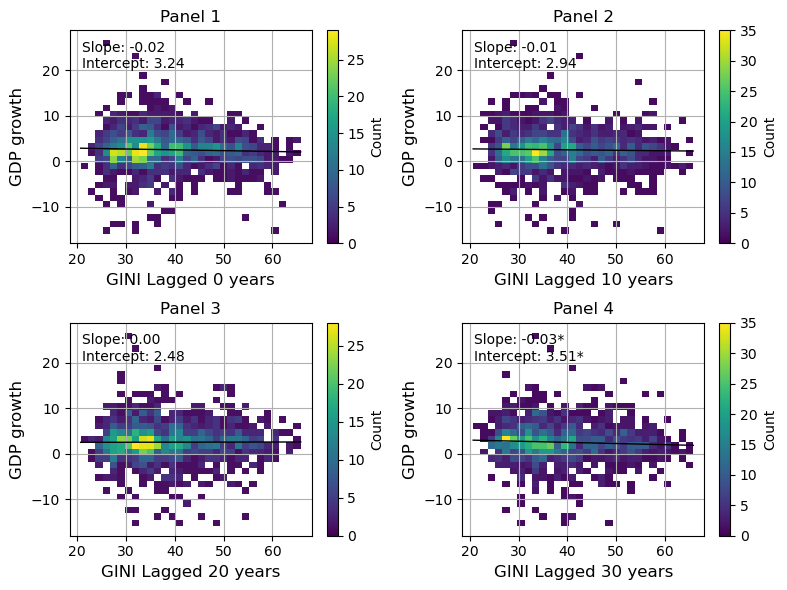

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import linregress

# Drop missing
final_data2 = final.dropna(subset=['GINI', 'GDP_growth'], how='any')

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Loop through each subplot and plot the scatterplot with appropriate GINI lag
for i, ax in enumerate(axs.flatten()):
    # Lag GINI by i years
    final_data2['GINI_lagged'] = final_data2['GINI'].shift(i * 10)
    
    # Drop rows with missing values
    final_data2_filtered = final_data2.dropna(subset=['GINI_lagged', 'GDP_growth'], how='any')
    
    # Create scatterplot with size and color
    sns.histplot(x='GINI_lagged', y='GDP_growth', data=final_data2_filtered, ax=ax, bins=30, cbar=True, cmap='viridis', cbar_kws={'label': 'Count'})
    
    # Add regression line and display coefficients with significance stars
    slope, intercept, r_value, p_value, std_err = linregress(final_data2_filtered['GINI_lagged'], final_data2_filtered['GDP_growth'])
    significance_slope = ""
    significance_intercept = ""
    if p_value < 0.001:
        significance_slope = "***"
        significance_intercept = "***"
    elif p_value < 0.01:
        significance_slope = "**"
        significance_intercept = "**"
    elif p_value < 0.05:
        significance_slope = "*"
        significance_intercept = "*"
    
    # Add regression line to the scatterplot
    x = np.linspace(final_data2_filtered['GINI_lagged'].min(), final_data2_filtered['GINI_lagged'].max(), 100)
    y = slope * x + intercept
    ax.plot(x, y, color='black', linewidth=1)
    
    ax.annotate(f'Slope: {slope:.2f}{significance_slope}\nIntercept: {intercept:.2f}{significance_intercept}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
    
    ax.set_xlabel(f'GINI Lagged {i * 10} years', fontsize=12)  # x-axis label with lag
    ax.set_ylabel('GDP growth', fontsize=12)  # y-axis label
    ax.set_title(f'Panel {i + 1}', fontsize=12)  # plot title
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
list = ['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']
X = final.loc[:,['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']] #COC skal ændres til governance indikator
for i in list:
    X[i] = X[i].shift(-10) # COC skal ændres...

X = sm.add_constant(X)

y = final.loc[:,'GDP']

model = sm.OLS(y,X, missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     167.9
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          1.16e-186
Time:                        19:58:02   Log-Likelihood:                -36692.
No. Observations:                3298   AIC:                         7.340e+04
Df Residuals:                    3291   BIC:                         7.344e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.287e+04    287.912     44.692      0.000    1.23e+04    1.34e+04
COC         4427.2232    910.612      4.862      0.000    2641.799    6212.647
GOV         4528.0297   1055.222      4.291      0.000    2459.072    6596.988
REQ         1379.9440    863.740      1.598      0.110    -313.578    3073.466
ROL         1076.9086   1127.476      0.955      0.340   -1133.717    3287.534
RSA          300.2005    471.570      0.637      0.524    -624.401    1224.802
VOA        -3024.9700    531.464     -5.692      0.000   -4067.004   -1982.936
==============================================================================
Omnibus:                     1799.805   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18458.682
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      13.546   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm 
list = ['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']
X = final.loc[:,['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']] #COC skal ændres til governance indikator
for i in list:
    X[i] = X[i].shift(-10) # COC skal ændres...

X = sm.add_constant(X)

y = final.loc[:,'GINI']

model = sm.OLS(y,X, missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GINI   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     39.15
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.18e-42
Time:                        19:58:02   Log-Likelihood:                -3341.0
No. Observations:                 958   AIC:                             6696.
Df Residuals:                     951   BIC:                             6730.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6003      0.283    136.448      0.000      38.045      39.155
COC            2.3628      0.891      2.653      0.008       0.615       4.111
GOV           -4.3596      1.093     -3.989      0.000      -6.504      -2.215
REQ            3.0411      0.863      3.525      0.000       1.348       4.734
ROL           -4.0386      1.156     -3.494      0.000      -6.307      -1.770
RSA           -1.9564      0.458     -4.275      0.000      -2.855      -1.058
VOA            1.4095      0.555      2.539      0.011       0.320       2.499
==============================================================================
Omnibus:                       58.181   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.172
Skew:                           0.606   Prob(JB):                     1.57e-15
Kurtosis:                       3.491   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Sort dataset to contain years 2000-2020
years = range(2000, 2021)
final1 = final.loc[final['year'].isin(years)]
final1 = final1.dropna(subset=['GDP'], how='any')

# Detrend GDP
from scipy import signal
y = final1.loc[:, 'GDP']
y_detrended = signal.detrend(y)

# Calculate std. of GDP for each country
final1['std'] = final1.groupby('country')['GDP'].transform('std')

# Select only one year (=2017)
final2 = final1.loc[final['year'] == 2000]

# Regress std. on lagged governance
X = final2.loc[:, ['COC']]  # COC should be changed to governance indicator
X = sm.add_constant(X)

y = final2.loc[:, 'std']

model = sm.OLS(y, X, missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    std   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     37.50
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           6.14e-09
Time:                        19:58:03   Log-Likelihood:                -1553.4
No. Observations:                 172   AIC:                             3111.
Df Residuals:                     170   BIC:                             3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1425.8404    155.212      9.186      0.000    1119.450    1732.231
COC          941.5879    153.758      6.124      0.000     638.066    1245.110
==============================================================================
Omnibus:                      253.216   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23129.848
Skew:                           6.336   Prob(JB):                         0.00
Kurtosis:                      58.379   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

ADD CONCISE CONLUSION.